In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
data =  pd.read_csv(r'C:\Users\31645\OneDrive\Documents\Ironhack\LABs\data_mid_bootcamp_project_FIFA_MoneyBall\fifa21_male2.csv')
data

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [4]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [5]:
#to see all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 110)


In [6]:
data.dtypes

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control        

In [7]:
# standardization of the columns
def col_fix(dataset):
    dataset.columns = [dataset.columns[i].upper().replace(' ','_') for i in range(len(data.columns))]
    return dataset
    
col_fix(data)

,ID,NAME,AGE,OVA,NATIONALITY,CLUB,BOV,BP,POSITION,PLAYER_PHOTO,CLUB_LOGO,FLAG_PHOTO,POT,TEAM_&_CONTRACT,HEIGHT,WEIGHT,FOOT,GROWTH,JOINED,LOAN_DATE_END,VALUE,WAGE,RELEASE_CLAUSE,CONTRACT,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,HITS,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,GENDER
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [8]:
data = data.set_index('ID')
data

,NAME,AGE,OVA,NATIONALITY,CLUB,BOV,BP,POSITION,PLAYER_PHOTO,CLUB_LOGO,FLAG_PHOTO,POT,TEAM_&_CONTRACT,HEIGHT,WEIGHT,FOOT,GROWTH,JOINED,LOAN_DATE_END,VALUE,WAGE,RELEASE_CLAUSE,CONTRACT,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,HITS,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,GENDER
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,NaN,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,NaN,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.0,72.0,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,

In [9]:
data.describe

<bound method NDFrame.describe of                    NAME  AGE  OVA            NATIONALITY           CLUB  BOV  \
ID                                                                             
2           G. Pasquale   33   69                  Italy        Udinese   71   
16          Luis García   37   71                  Spain      KAS Eupen   70   
27              J. Cole   33   71                England  Coventry City   71   
36             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
41              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                 ...  ...  ...                    ...            ...  ...   
259088       A. Medioub   22   64                 France     CD Tondela   66   
259090       W. Rickard   18   56                  Wales        Burnley   58   
259091       C. Barrett   18   56                England        Burnley   56   
259101   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
259105

In [10]:
#check for NAN values


data.isna().sum()

NAME                    0
AGE                     0
OVA                     0
NATIONALITY             0
CLUB                   23
BOV                     0
BP                      0
POSITION              413
PLAYER_PHOTO            0
CLUB_LOGO              23
FLAG_PHOTO              0
POT                     0
TEAM_&_CONTRACT         0
HEIGHT                  0
WEIGHT                  0
FOOT                    0
GROWTH                  0
JOINED                 58
LOAN_DATE_END       16215
VALUE                   0
WAGE                    0
RELEASE_CLAUSE          0
CONTRACT                0
ATTACKING               0
CROSSING                0
FINISHING               0
HEADING_ACCURACY        0
SHORT_PASSING           0
VOLLEYS                58
SKILL                   0
DRIBBLING               0
CURVE                  58
FK_ACCURACY             0
LONG_PASSING            0
BALL_CONTROL            0
MOVEMENT                0
ACCELERATION            0
SPRINT_SPEED            0
AGILITY     

In [11]:
#dropping NANs and replacing NANs

data = data.drop(['LOAN_DATE_END', 'CLUB_LOGO', 'FLAG_PHOTO', 'PLAYER_PHOTO'], axis=1)
data = data.fillna(0)

In [12]:
data.isna().sum()

NAME                0
AGE                 0
OVA                 0
NATIONALITY         0
CLUB                0
BOV                 0
BP                  0
POSITION            0
POT                 0
TEAM_&_CONTRACT     0
HEIGHT              0
WEIGHT              0
FOOT                0
GROWTH              0
JOINED              0
VALUE               0
WAGE                0
RELEASE_CLAUSE      0
CONTRACT            0
ATTACKING           0
CROSSING            0
FINISHING           0
HEADING_ACCURACY    0
SHORT_PASSING       0
VOLLEYS             0
SKILL               0
DRIBBLING           0
CURVE               0
FK_ACCURACY         0
LONG_PASSING        0
BALL_CONTROL        0
MOVEMENT            0
ACCELERATION        0
SPRINT_SPEED        0
AGILITY             0
REACTIONS           0
BALANCE             0
POWER               0
SHOT_POWER          0
JUMPING             0
STAMINA             0
STRENGTH            0
LONG_SHOTS          0
MENTALITY           0
AGGRESSION          0
INTERCEPTI

In [13]:
data

,NAME,AGE,OVA,NATIONALITY,CLUB,BOV,BP,POSITION,POT,TEAM_&_CONTRACT,HEIGHT,WEIGHT,FOOT,GROWTH,JOINED,VALUE,WAGE,RELEASE_CLAUSE,CONTRACT,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,HITS,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,GENDER
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.0,338,73,65.0,60,69,71,347,68,74,68.0,69,68.0,347,74,68.0,69,68,68,320,72,69.0,63.0,66.0,50,0.0,208,70,69,69.0,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.0,369,69,79.0,79,71,71,305,56,50,62.0,65,72.0,324,75,54.0,64,60,71,362,71,71.0,72.0,73.0,75,79.0,153,70,43,40.0,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.0,387,79,84.0,77,69,78,295,48,42,71.0,59,75.0,284,72,58.0,29,56,69,317,69,39.0,69.0,74.0,66,0.0,99,35,34,30.0,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,0,82,Sunderland 2009,"5'11""",165lbs,Right,14,0,€0,€0,€0,2009,264,54,70,60,80,0.0,255,68,0.0,46,64,77,176,59,62,0.0,55,0.0,239,63,0.0,51,66,59,271,59,70.0,72.0,0.0,70,0.0,75,34,41,0.0,68,5,21,64,21,21,1348,369,3 ★,1★,0,0,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.0,408,85,80.0,70,83,90,346,61,56,79.0,75,75.0,297,67,40.0,58,62,70,370,58,70.0,78.0,93.0,71,89.0,181,68,57,56.0,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,69,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,5,"Sep 29, 2020",€550K,€2K,€0,"Jun 30, 2021 On Loan",197,35,23,66,47,26.0,193,44,26.0,33,34,56,243,52,55,46.0,48,42.0,279,48,70.0,59,74,28,218,69,58.0,23.0,29.0,39,46.0,198,61,71,66.0,39,11,8,8,5,7,1367,302,2 ★,2★,Medium,Medium,1 ★,54,30,37,48,64,69,5,43+

In [14]:
data.dtypes

NAME                 object
AGE                   int64
OVA                   int64
NATIONALITY          object
CLUB                 object
BOV                   int64
BP                   object
POSITION             object
POT                   int64
TEAM_&_CONTRACT      object
HEIGHT               object
WEIGHT               object
FOOT                 object
GROWTH                int64
JOINED               object
VALUE                object
WAGE                 object
RELEASE_CLAUSE       object
CONTRACT             object
ATTACKING             int64
CROSSING              int64
FINISHING             int64
HEADING_ACCURACY      int64
SHORT_PASSING         int64
VOLLEYS             float64
SKILL                 int64
DRIBBLING             int64
CURVE               float64
FK_ACCURACY           int64
LONG_PASSING          int64
BALL_CONTROL          int64
MOVEMENT              int64
ACCELERATION          int64
SPRINT_SPEED          int64
AGILITY             float64
REACTIONS           

In [15]:
data['WAGE']

ID
2          €7K
16         €7K
27        €15K
36          €0
41        €12K
          ... 
259088     €2K
259090     €3K
259091     €2K
259101     €3K
259105     €2K
Name: WAGE, Length: 17125, dtype: object

In [16]:
data_cat = data.select_dtypes('object')
data_cat

,NAME,NATIONALITY,CLUB,BP,POSITION,TEAM_&_CONTRACT,HEIGHT,WEIGHT,FOOT,JOINED,VALUE,WAGE,RELEASE_CLAUSE,CONTRACT,W/F,SM,A/W,D/W,IR,HITS,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,GENDER
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,Italy,Udinese,LWB,LM,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,"Jul 1, 2008",€625K,€7K,€0,2008 ~ 2016,3 ★,2★,Medium,High,2 ★,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,"Jul 19, 2014",€600K,€7K,€1.1M,2014 ~ 2019,4 ★,3★,Medium,Medium,1 ★,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,England,Coventry City,CAM,CAM RM RW LM,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,"Jan 7, 2016",€1.1M,€15K,€0,2016 ~ 2020,4 ★,4★,Medium,Low,2 ★,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,0,Sunderland 2009,"5'11""",165lbs,Right,0,€0,€0,€0,2009,3 ★,1★,0,0,1 ★,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,"Jul 16, 2018",€5.5M,€12K,€7.2M,2018 ~ 2021,4 ★,4★,High,Medium,4 ★,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,France,CD Tondela,CB,CB,"CD Tondela Jun 30, 2021 On Loan","6'6""",165lbs,Right,"Sep 29, 2020",€550K,€2K,€0,"Jun 30, 2021 On Loan",2 ★,2★,Medium,Medium,1 ★,5,43+2,43+2,43+2,41+0,41+0,41+0,41+0,41+0,41+2,41+2,41+2,43+2,44+2,44+2,44+2,43+2,54+2,55+2,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,Wales,Burnley,CAM,CAM CM,Burnley 2020 ~ 2021,"5'10""",170lbs,Right,"Aug 20, 2020",€130K,€3K,€273K,2020 ~ 2021,3 ★,2★,Medium,Medium,1 ★,5,53+2,53+2,53+2,55+0,54+0,54+0,54+0,55+0,56+2,56+2,56+2,56+2,55+2,55+2,55+2,56+2,53+2,52+2,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,England,Burnley,RB,RB,Burnley 2020 ~ 2022,"5'9""",154lbs,Right,"Aug 20, 2020",€130K,€2K,€273K,2020 ~ 2022,3 ★,2★,Medium,Medium,1 ★,3,46+2,46+2,46+2,50+0,47+0,47+0,47+0,50+0,47+2,47+2,47+2,50+2,46+2,46+2,46+2,50+2,54+2,50+2,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [17]:
def convert_to_number(s):
    try:
        x = float(s)
    except:
        x = round(float(s.replace('€', '').replace('K','000').replace('M','000000')),0)
    return x

In [18]:
data['WAGE'] = data['WAGE'].apply(convert_to_number)
data['VALUE'] = data['VALUE'].apply(convert_to_number)
data['RELEASE_CLAUSE'] = data['RELEASE_CLAUSE'].apply(convert_to_number)
data.dtypes

NAME                 object
AGE                   int64
OVA                   int64
NATIONALITY          object
CLUB                 object
BOV                   int64
BP                   object
POSITION             object
POT                   int64
TEAM_&_CONTRACT      object
HEIGHT               object
WEIGHT               object
FOOT                 object
GROWTH                int64
JOINED               object
VALUE               float64
WAGE                float64
RELEASE_CLAUSE      float64
CONTRACT             object
ATTACKING             int64
CROSSING              int64
FINISHING             int64
HEADING_ACCURACY      int64
SHORT_PASSING         int64
VOLLEYS             float64
SKILL                 int64
DRIBBLING             int64
CURVE               float64
FK_ACCURACY           int64
LONG_PASSING          int64
BALL_CONTROL          int64
MOVEMENT              int64
ACCELERATION          int64
SPRINT_SPEED          int64
AGILITY             float64
REACTIONS           

In [19]:
data['VALUE']

ID
2         625000.0
16        600000.0
27             1.0
36             0.0
41             6.0
            ...   
259088    550000.0
259090    130000.0
259091    130000.0
259101    475000.0
259105    325000.0
Name: VALUE, Length: 17125, dtype: float64

In [20]:
#checking values
data['VALUE']

ID
2         625000.0
16        600000.0
27             1.0
36             0.0
41             6.0
            ...   
259088    550000.0
259090    130000.0
259091    130000.0
259101    475000.0
259105    325000.0
Name: VALUE, Length: 17125, dtype: float64

In [21]:
data_num = data.select_dtypes(include = 'number')
data_num.columns

Index(['AGE', 'OVA', 'BOV', 'POT', 'GROWTH', 'VALUE', 'WAGE', 'RELEASE_CLAUSE',
       'ATTACKING', 'CROSSING', 'FINISHING', 'HEADING_ACCURACY',
       'SHORT_PASSING', 'VOLLEYS', 'SKILL', 'DRIBBLING', 'CURVE',
       'FK_ACCURACY', 'LONG_PASSING', 'BALL_CONTROL', 'MOVEMENT',
       'ACCELERATION', 'SPRINT_SPEED', 'AGILITY', 'REACTIONS', 'BALANCE',
       'POWER', 'SHOT_POWER', 'JUMPING', 'STAMINA', 'STRENGTH', 'LONG_SHOTS',
       'MENTALITY', 'AGGRESSION', 'INTERCEPTIONS', 'POSITIONING', 'VISION',
       'PENALTIES', 'COMPOSURE', 'DEFENDING', 'MARKING', 'STANDING_TACKLE',
       'SLIDING_TACKLE', 'GOALKEEPING', 'GK_DIVING', 'GK_HANDLING',
       'GK_KICKING', 'GK_POSITIONING', 'GK_REFLEXES', 'TOTAL_STATS',
       'BASE_STATS', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'],
      dtype='object')

In [22]:
#depending of the position we need to define player value
data['BP'].value_counts()

CB     3252
ST     2660
CAM    2246
GK     1576
RM     1404
CDM    1246
CM      990
LB      921
RB      894
LM      805
RW      329
LWB     252
RWB     252
LW      209
CF       89
Name: BP, dtype: int64

In [23]:
Position_grouped = data.groupby(data.BP)
CB = Position_grouped.get_group('CB')
CB

,NAME,AGE,OVA,NATIONALITY,CLUB,BOV,BP,POSITION,POT,TEAM_&_CONTRACT,HEIGHT,WEIGHT,FOOT,GROWTH,JOINED,VALUE,WAGE,RELEASE_CLAUSE,CONTRACT,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,HITS,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,GENDER
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
244,G. Neville B,35,76,England,Manchester United,78,CB,RB CB RWB,82,Manchester United 1991 ~ 2011,"5'10""",174lbs,Right,6,"Jan 1, 1991",0.0,0.0,0.0,1991 ~ 2011,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,0.0,242,78,81,83.0,43,12,9,5,6,11,1774,378,3 ★,2★,0,0,3 ★,67,36,67,53,81,74,4,54+0,54+0,54+0,60+0,56+0,56+0,56+0,60+0,56+0,56+0,56+0,62+0,64+0,64+0,64+0,62+0,73+0,74+0,74+0,74+0,73+0,76+0,78+0,78+0,78+0,76+0,13+0,Male
249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",120000.0,7000.0,0.0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,0.0,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male
388,S. Campbell,35,75,England,Newcastle United,75,CB,0,79,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,4,"Sep 2, 2010",0.0,0.0,0.0,2010 ~ 2011,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,0.0,222,72,77,73.0,44,11,7,12,5,9,1581,347,3 ★,2★,0,0,3 ★,65,34,43,48,76,81,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male
496,D. Hamann,36,61,Germany,Milton Keynes Dons,67,CB,0,82,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,21,"Sep 2, 2010",0.0,0.0,0.0,2010 ~ 2011,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,0.0,198,70,72,56.0,56,11,12,10,8,15,1698,343,3 ★,2★,0,0,3 ★,42,51,68,46,69,67,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+0,59+0,59+0,53+0,61+0,61+0,61+0,53+0,58+0,65+0,65+0,65+0,58+0,62+0,67+0,67+0,67+0,62+0,14+0,Male
1088,A. Nesta,37,73,Italy,Montreal Impact,72,CB,CB,73,Montreal Impact 2012 ~ 2013,"6'2""",174lbs,Right,0,"Jul 1, 2012",0.0,6000.0,0.0,2012 ~ 2013,231,36,22,71,65,37.0,257,54,46.0,25,62,70,243,50,34,38.0,70,51.0,263,48,74.0,33,74,34,277,67,76.0,37.0,55.0,42,0.0,221,74,77,70.0,56,8,9,14,12,13,1548,322,3 ★,2★,Medium,High,3 ★,41,32,54,58,75,62,7,47+1,47+1,47+1,49+1,49+1,49+1,49+1,49+1,53+1,53+1,53+1,53+1,59+1,59+1,59+1,53+1,61+1,67+1,67+1,67+1,61+1,64+1,72+1,72+1,72+1,64+1,14+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259066,F. Boyomo,18,60,France,Albacete BP,62,CB,CB,78,Albacete BP 2020 ~ 2022,"6'0""",174lbs,Right,18,"Aug 2, 2020",400000.0,500.0,870000.0,2020 ~ 2022,190,29,25,59,48,29.0,179,31,34.0,28,43,43,288,63,66,51.0,51,57.0,265,47,70.0,59,67,22,215,52,58.0,25.0,30.0,50,47.0,189,56,70,63.0,56,10,11,13,14,8,1382,296,2 ★,2★,Low,Med

In [24]:
#doing analysis on the segment CB position
#splitting database on  numerical and categorical columns
CB_num = CB.select_dtypes('number')
CB_num

,AGE,OVA,BOV,POT,GROWTH,VALUE,WAGE,RELEASE_CLAUSE,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,PAC,SHO,PAS,DRI,DEF,PHY
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
244,35,76,78,82,6,0.0,0.0,0.0,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,0.0,242,78,81,83.0,43,12,9,5,6,11,1774,378,67,36,67,53,81,74
249,35,74,75,74,0,120000.0,7000.0,0.0,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,0.0,224,77,75,72.0,41,10,7,12,5,7,1868,381,51,53,67,62,76,72
388,35,75,75,79,4,0.0,0.0,0.0,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,0.0,222,72,77,73.0,44,11,7,12,5,9,1581,347,65,34,43,48,76,81
496,36,61,67,82,21,0.0,0.0,0.0,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,0.0,198,70,72,56.0,56,11,12,10,8,15,1698,343,42,51,68,46,69,67
1088,37,73,72,73,0,0.0,6000.0,0.0,231,36,22,71,65,37.0,257,54,46.0,25,62,70,243,50,34,38.0,70,51.0,263,48,74.0,33,74,34,277,67,76.0,37.0,55.0,42,0.0,221,74,77,70.0,56,8,9,14,12,13,1548,322,41,32,54,58,75,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259066,18,60,62,78,18,400000.0,500.0,870000.0,190,29,25,59,48,29.0,179,31,34.0,28,43,43,288,63,66,51.0,51,57.0,265,47,70.0,59,67,22,215,52,58.0,25.0,30.0,50,47.0,189,56,70,63.0,56,10,11,13,14,8,1382,296,65,30,38,39,62,62
259068,19,63,65,73,10,525000.0,1000.0,945000.0,246,45,35,60,65,41.0,245,55,37.0,33,62,58,303,62,67,58.0,60,56.0,328,72,63.0,66,80,47,273,72,61.0,46.0,52.0,42,55.0,177,58,62,57.0,51,11,9,6,12,13,1623,357,65,46,55,57,60,74
259074,17,53,55,79,26,120000.0,500.0,300000.0,161,31,17,53,32,28.0,134,22,30.0,29,25,28,262,58,61,45.0,48,50.0,252,38,66.0,56,68,24,195,51,53.0,28.0,27.0,36,39.0,157,47,58,52.0,46,12,9,9,11,5,1207,259,60,25,30,29,53,62


In [25]:
CB_cat = CB.select_dtypes('object')
CB_cat

,NAME,NATIONALITY,CLUB,BP,POSITION,TEAM_&_CONTRACT,HEIGHT,WEIGHT,FOOT,JOINED,CONTRACT,W/F,SM,A/W,D/W,IR,HITS,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,GENDER
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
244,G. Neville B,England,Manchester United,CB,RB CB RWB,Manchester United 1991 ~ 2011,"5'10""",174lbs,Right,"Jan 1, 1991",1991 ~ 2011,3 ★,2★,0,0,3 ★,4,54+0,54+0,54+0,60+0,56+0,56+0,56+0,60+0,56+0,56+0,56+0,62+0,64+0,64+0,64+0,62+0,73+0,74+0,74+0,74+0,73+0,76+0,78+0,78+0,78+0,76+0,13+0,Male
249,P. Neville,England,Everton,CB,CDM CM RB,Everton 2005 ~ 2013,"5'11""",168lbs,Right,"Aug 1, 2005",2005 ~ 2013,4 ★,2★,Medium,High,2 ★,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male
388,S. Campbell,England,Newcastle United,CB,0,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,"Sep 2, 2010",2010 ~ 2011,3 ★,2★,0,0,3 ★,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male
496,D. Hamann,Germany,Milton Keynes Dons,CB,0,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,"Sep 2, 2010",2010 ~ 2011,3 ★,2★,0,0,3 ★,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+0,59+0,59+0,53+0,61+0,61+0,61+0,53+0,58+0,65+0,65+0,65+0,58+0,62+0,67+0,67+0,67+0,62+0,14+0,Male
1088,A. Nesta,Italy,Montreal Impact,CB,CB,Montreal Impact 2012 ~ 2013,"6'2""",174lbs,Right,"Jul 1, 2012",2012 ~ 2013,3 ★,2★,Medium,High,3 ★,7,47+1,47+1,47+1,49+1,49+1,49+1,49+1,49+1,53+1,53+1,53+1,53+1,59+1,59+1,59+1,53+1,61+1,67+1,67+1,67+1,61+1,64+1,72+1,72+1,72+1,64+1,14+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259066,F. Boyomo,France,Albacete BP,CB,CB,Albacete BP 2020 ~ 2022,"6'0""",174lbs,Right,"Aug 2, 2020",2020 ~ 2022,2 ★,2★,Low,Medium,1 ★,7,42+2,42+2,42+2,39+0,39+0,39+0,39+0,39+0,39+2,39+2,39+2,41+2,43+2,43+2,43+2,41+2,53+2,54+2,54+2,54+2,53+2,56+2,60+2,60+2,60+2,56+2,15+2,Male
259068,I. Kébé,Mali,Girona FC,CB,CDM,Girona FC 2019 ~ 2021,"6'1""",176lbs,Right,"Jul 1, 2019",2019 ~ 2021,3 ★,2★,Medium,Medium,1 ★,8,55+2,55+2,55+2,54+0,55+0,55+0,55+0,54+0,55+2,55+2,55+2,56+2,58+2,58+2,58+2,56+2,59+2,62+2,62+2,62+2,59+2,60+2,63+2,63+2,63+2,60+2,16+2,Male
259074,A. Hajdari,Switzerland,FC Basel 1893,CB,CB,FC Basel 1893 2020 ~ 2024,"6'2""",176lbs,Left,"Sep 14, 2020",2020 ~ 2024,3 ★,2★,Low,Medium,1 ★,37,36+2,36+2,36+2,32+0,32+0,32+0,32+0,32+0,31+2,31+2,31+2,34+2,33+2,33+2,33+2,34+2,45+2,44+2,44+2,44+2,45+2,48+2,53+2,53+2,53+2,48+2,14+2,Male


In [26]:
CB.describe

<bound method NDFrame.describe of                  NAME  AGE  OVA  NATIONALITY                CLUB  BOV  BP  \
ID                                                                          
244     G. Neville  B   35   76      England   Manchester United   78  CB   
249        P. Neville   35   74      England             Everton   75  CB   
388       S. Campbell   35   75      England    Newcastle United   75  CB   
496         D. Hamann   36   61      Germany  Milton Keynes Dons   67  CB   
1088         A. Nesta   37   73        Italy     Montreal Impact   72  CB   
...               ...  ...  ...          ...                 ...  ...  ..   
259066      F. Boyomo   18   60       France         Albacete BP   62  CB   
259068        I. Kébé   19   63         Mali           Girona FC   65  CB   
259074     A. Hajdari   17   53  Switzerland       FC Basel 1893   55  CB   
259082    J. Lawrence   17   52      Germany   Bayern München II   54  CB   
259088     A. Medioub   22   64       Fran

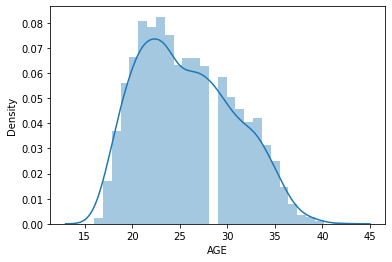

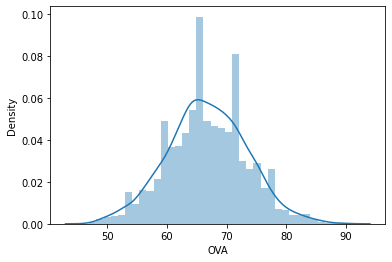

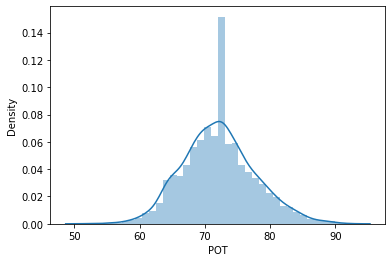

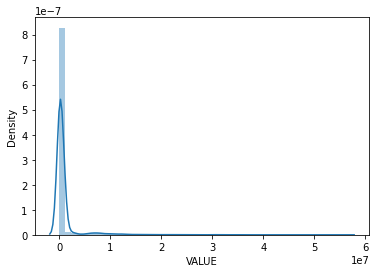

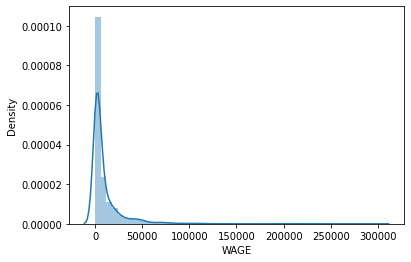

In [27]:
#Exploring distribution of  numerical data
for col in CB.select_dtypes(np.number).columns:
    if col == 'OVA' or col == 'POT' or col == 'AGE' or col == 'WAGE' or col == 'VALUE':
        sns.distplot(CB[col])
        plt.show()

In [28]:
#exploring data - EDA
summary = CB_num.describe().T
display(summary)

,count,mean,std,min,25%,50%,75%,max
AGE,3252.0,25.722017,5.043176e+00,16.0,22.0,25.0,29.00,42.0
OVA,3252.0,66.730012,6.674830e+00,47.0,62.0,67.0,71.00,90.0
BOV,3252.0,67.982780,6.413157e+00,48.0,64.0,68.0,72.00,90.0
POT,3252.0,72.116544,5.567704e+00,52.0,68.0,72.0,76.00,92.0
GROWTH,3252.0,5.386531,5.590923e+00,-1.0,0.0,4.0,9.00,26.0
VALUE,3252.0,927914.793050,3.060225e+06,0.0,5.0,275000.0,625000.00,56000000.0
WAGE,3252.0,10173.954490,1.911003e+04,0.0,1000.0,3000.0,10000.00,300000.0
RELEASE_CLAUSE,3252.0,596236.014760,2.709632e+06,0.0,2.0,13.0,523500.00,85000000.0
ATTACKING,3252.0,235.335178,4.001862e+01,138.0,206.0,233.0,261.00,383.0
CROSSING,3252.0,42.950185,1.338023e+01,11.0,32.0,41.0,53.00,80.0


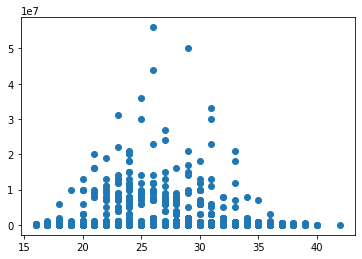

In [29]:
#correlation between 2 variables
a = CB_num['AGE']
b = CB_num['VALUE']

plt.scatter( a, b)
plt.show()
#players with highest value are between 25-30

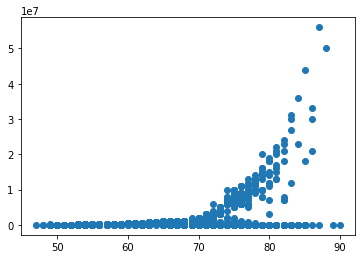

In [30]:

a = CB_num['OVA']
b = CB_num['VALUE']

plt.scatter( a, b)
plt.show()
#players with highest value have OVA >80

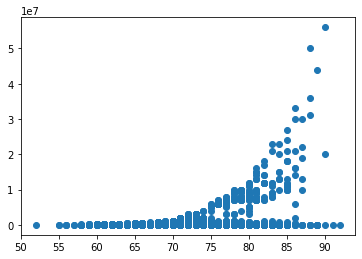

In [31]:

a = CB_num['POT']
b = CB_num['VALUE']

plt.scatter( a, b)
plt.show()
#players with highest value have POT >85

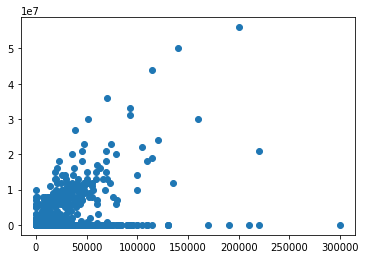

In [32]:
a = CB_num['WAGE']
b = CB_num['VALUE']

plt.scatter( a, b)
plt.show()
#players with highest value have WAGE >50000

In [33]:
#sorting players per value

sorted = CB.sort_values('VALUE', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
sorted['VALUE']

ID
212218    56000000.0
201024    50000000.0
207865    44000000.0
216460    36000000.0
178603    33000000.0
             ...    
139009           0.0
8842             0.0
251696           0.0
251705           0.0
244              0.0
Name: VALUE, Length: 3252, dtype: float64

In [34]:
CB

,NAME,AGE,OVA,NATIONALITY,CLUB,BOV,BP,POSITION,POT,TEAM_&_CONTRACT,HEIGHT,WEIGHT,FOOT,GROWTH,JOINED,VALUE,WAGE,RELEASE_CLAUSE,CONTRACT,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,HITS,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,GENDER
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
244,G. Neville B,35,76,England,Manchester United,78,CB,RB CB RWB,82,Manchester United 1991 ~ 2011,"5'10""",174lbs,Right,6,"Jan 1, 1991",0.0,0.0,0.0,1991 ~ 2011,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,0.0,242,78,81,83.0,43,12,9,5,6,11,1774,378,3 ★,2★,0,0,3 ★,67,36,67,53,81,74,4,54+0,54+0,54+0,60+0,56+0,56+0,56+0,60+0,56+0,56+0,56+0,62+0,64+0,64+0,64+0,62+0,73+0,74+0,74+0,74+0,73+0,76+0,78+0,78+0,78+0,76+0,13+0,Male
249,P. Neville,35,74,England,Everton,75,CB,CDM CM RB,74,Everton 2005 ~ 2013,"5'11""",168lbs,Right,0,"Aug 1, 2005",120000.0,7000.0,0.0,2005 ~ 2013,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,0.0,224,77,75,72.0,41,10,7,12,5,7,1868,381,4 ★,2★,Medium,High,2 ★,51,53,67,62,76,72,7,59+0,59+0,59+0,63+0,61+0,61+0,61+0,63+0,63+0,63+0,63+0,65+0,68+0,68+0,68+0,65+0,72+0,74+0,74+0,74+0,72+0,73+0,75+-1,75+-1,75+-1,73+0,12+0,Male
388,S. Campbell,35,75,England,Newcastle United,75,CB,0,79,Newcastle United 2010 ~ 2011,"6'2""",190lbs,Right,4,"Sep 2, 2010",0.0,0.0,0.0,2010 ~ 2011,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,0.0,222,72,77,73.0,44,11,7,12,5,9,1581,347,3 ★,2★,0,0,3 ★,65,34,43,48,76,81,3,51+0,51+0,51+0,48+0,48+0,48+0,48+0,48+0,49+0,49+0,49+0,48+0,56+0,56+0,56+0,48+0,63+0,68+0,68+0,68+0,63+0,70+0,75+0,75+0,75+0,70+0,12+0,Male
496,D. Hamann,36,61,Germany,Milton Keynes Dons,67,CB,0,82,Milton Keynes Dons 2010 ~ 2011,"6'2""",168lbs,Right,21,"Sep 2, 2010",0.0,0.0,0.0,2010 ~ 2011,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,0.0,198,70,72,56.0,56,11,12,10,8,15,1698,343,3 ★,2★,0,0,3 ★,42,51,68,46,69,67,3,51+0,51+0,51+0,50+0,51+0,51+0,51+0,50+0,59+0,59+0,59+0,53+0,61+0,61+0,61+0,53+0,58+0,65+0,65+0,65+0,58+0,62+0,67+0,67+0,67+0,62+0,14+0,Male
1088,A. Nesta,37,73,Italy,Montreal Impact,72,CB,CB,73,Montreal Impact 2012 ~ 2013,"6'2""",174lbs,Right,0,"Jul 1, 2012",0.0,6000.0,0.0,2012 ~ 2013,231,36,22,71,65,37.0,257,54,46.0,25,62,70,243,50,34,38.0,70,51.0,263,48,74.0,33,74,34,277,67,76.0,37.0,55.0,42,0.0,221,74,77,70.0,56,8,9,14,12,13,1548,322,3 ★,2★,Medium,High,3 ★,41,32,54,58,75,62,7,47+1,47+1,47+1,49+1,49+1,49+1,49+1,49+1,53+1,53+1,53+1,53+1,59+1,59+1,59+1,53+1,61+1,67+1,67+1,67+1,61+1,64+1,72+1,72+1,72+1,64+1,14+1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259066,F. Boyomo,18,60,France,Albacete BP,62,CB,CB,78,Albacete BP 2020 ~ 2022,"6'0""",174lbs,Right,18,"Aug 2, 2020",400000.0,500.0,870000.0,2020 ~ 2022,190,29,25,59,48,29.0,179,31,34.0,28,43,43,288,63,66,51.0,51,57.0,265,47,70.0,59,67,22,215,52,58.0,25.0,30.0,50,47.0,189,56,70,63.0,56,10,11,13,14,8,1382,296,2 ★,2★,Low,Med

In [35]:
#top 10 players by value
top_players = sorted[['NAME', 'AGE', "OVA", "CLUB", 'POT', "VALUE", 'WAGE', 'BOV', 'DEFENDING', 'HEADING_ACCURACY', 'INTERCEPTIONS', 'TOTAL_STATS']]
top_players.nlargest(10, ['VALUE'])

,NAME,AGE,OVA,CLUB,POT,VALUE,WAGE,BOV,DEFENDING,HEADING_ACCURACY,INTERCEPTIONS,TOTAL_STATS
ID,,,,,,,,,,,,
212218,A. Laporte,26,87,Manchester City,90,56000000.0,200000.0,88,266,86,87.0,1983
201024,K. Koulibaly,29,88,Napoli,88,50000000.0,140000.0,88,267,84,87.0,1734
207865,Marquinhos,26,85,Paris Saint-Germain,89,44000000.0,115000.0,87,261,84,86.0,1962
216460,J. Giménez,25,84,Atlético Madrid,88,36000000.0,70000.0,86,261,78,85.0,1761
178603,M. Hummels,31,86,Borussia Dortmund,86,33000000.0,93000.0,86,264,87,91.0,2040
225100,J. Gomez,23,83,Liverpool,88,31000000.0,93000.0,84,250,74,84.0,1824
177509,M. Benatia,31,86,Juventus,86,30000000.0,160000.0,84,261,83,86.0,1803
210413,A. Romagnoli,25,83,Milan,87,30000000.0,51000.0,85,256,78,86.0,1782
219693,Diego Carlos,27,83,Sevilla FC,85,27000000.0,39000.0,84,246,79,84.0,1935


1. Rank players by market value.
best ranked player by Value is A. Laporte worth 56000000.0 eur with OVA 87, POT 90, total_stats 1983 playing for MC
2. Highlight the top players for their outstanding performances over a discrete season.
Above 10players have the highest statistics
3. Decide when to transfer a player.
best timing is to transfer player when he reaches out highest market value and replace him with player having the same performances and lower market value - in this case club  Napoli can sell K. Koulibaly	 and replace him with Marquinhos from Paris Saint-Germain	with even higher stats 

In [36]:
#what variable has the biggest correlation on player Value
data_corr = CB_num.corr(method = 'pearson').abs()
display(data_corr)

,AGE,OVA,BOV,POT,GROWTH,VALUE,WAGE,RELEASE_CLAUSE,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,PAC,SHO,PAS,DRI,DEF,PHY
AGE,1.000000,0.529787,0.446478,0.226080,0.857638,0.009550,0.215788,0.025087,0.463623,0.293577,0.338870,0.510389,0.365497,0.287837,0.402929,0.226446,0.305660,0.327812,0.415029,0.352935,0.157790,0.367827,0.351583,0.073570,0.484670,0.115132,0.419291,0.405550,0.071563,0.011701,0.432986,0.386610,0.519543,0.530044,0.498796,0.295565,0.314120,0.333206,0.237841,0.456150,0.509137,0.426113,0.328146,0.136520,0.077053,0.073596,0.117041,0.091840,0.085835,0.427520,0.353127,0.374353,0.418593,0.423466,0.266976,0.509335,0.439908
OVA,0.529787,1.000000,0.986535,0.595938,0.600406,0.346737,0.627955,0.150383,0.689239,0.387335,0.397844,0.862832,0.739792,0.336554,0.636309,0.517021,0.366622,0.333284,0.685174,0.707148,0.227316,0.014739,0.072131,0.112368,0.880532,0.065852,0.625424,0.516125,0.231193,0.296179,0.530452,0.422825,0.729543,0.753489,0.908754,0.352952,0.459383,0.345054,0.503882,0.940253,0.925153,0.925648,0.762210,0.093694,0.066189,0.051890,0.084407,0.063211,0.039102,0.758275,0.767091,0.035674,0.490978,0.675991,0.605239,0.974365,0.693040
BOV,0.446478,0.986535,1.000000,0.647168,0.533314,0.362327,0.628774,0.155023,0.685430,0.383577,0.396168,0.849679,0.750066,0.329624,0.636631,0.535496,0.356302,0.318352,0.683734,0.720090,0.265945,0.031299,0.118572,0.137052,0.874802,0.046862,0.623974,0.501158,0.240879,0.326246,0.514882,0.412234,0.721888,0.741806,0.900908,0.355751,0.461612,0.327754,0.503141,0.936242,0.914648,0.923927,0.763719,0.079555,0.056817,0.044831,0.074330,0.054917,0.032027,0.762487,0.781732,0.083905,0.482369,0.676844,0.624653,0.966628,0.692488
POT,0.226080,0.595938,0.647168,1.000000,0.284375,0.345676,0.502511,0.136761,0.329768,0.150551,0.132377,0.475756,0.453668,0.123363,0.327331,0.328361,0.136187,0.103589,0.362418,0.427996,0.310197,0.229739,0.298844,0.118936,0.503748,0.026694,0.259451,0.210480,0.165864,0.189960,0.131823,0.124733,0.347812,0.325166,0.556535,0.134743,0.218625,0.140207,0.273309,0.592059,0.546043,0.622096,0.483156,0.046891,0.014865,0.019688,0.024733,0.009377,0.040100,0.414741,0.471627,0.280419,0.172381,0.353460,0.387681,0.603850,0.272044
GROWTH,0.857638,0.600406,0.533314,0.284375,1.000000,0.069718,0.249272,0.043345,0.494463,0.312501,0.343146,0.556328,0.431431,0.278950,0.433698,0.290258,0.302078,0.294739,0.457095,0.418023,0.037524,0.246381,0.211488,0.015711,0.549584,0.105202,0.488300,0.406580,0.110839,0.164428,0.502014,0.380582,0.524611,0.575751,0.530710,0.287194,0.330726,0.272325,0.329396,0.532939,0.560735,0.485590,0.428830,0.158555,0.093825,0.081556,0.076141,0.084804,0.086616,0.492263,0.446138,0.236664,0.414498,0.455053,0.336505,0.561921,0.556484
VALUE,0.009550,0.346737,0.362327,0.345676,0.069718,1.000000,0.453232,0.298798,0.199669,0.109859,0.096460,0.268971,0.249476,0.072588,0.183582,0.195927,0.080804,0.041394,0.209534,0.233409,0.175137,0.106188,0.147731,0.086303,0.318351,0.014402,0.161932,0.108378,0.116811,0.127781,0.140540,0.048726,0.220306,0.213952,0.322457,0.105020,0.175517,0.038254,0.206071,0.345441,0.314596,0.338743,0.307001,0.029674,0.023762,0.021640,0.015505,0.004649,0.031783,0.246158,0.274023,0.135211,0.097595,0.212980,0.221723,0.340424,0.212285
WAGE,0.215788,0.627955,0.628774,0.502511,0.249272,0.453232,1.000000,0.135047,0.433359,0.244719,0.257594,0.514449,0.440118,0.247446,0.409090,0.351689,0.261295,0.208916,0.421406,0.429287,0.214948,0.064734,0.125658,0.115282,0.566454,0.004528,0.365733,0.312452,0.190350,0.145987,0.251970,0.246797,0.466852,0.416631,0.586246,0.228209,0.355839,0.207654,0.299254,0.6

In [37]:
#most correlated variables 
data_corr[(data_corr['OVA'] > 0.8) | (data_corr['OVA'] < -0.8)][['OVA', 'VALUE']]

,OVA,VALUE
OVA,1.000000,0.346737
BOV,0.986535,0.362327
HEADING_ACCURACY,0.862832,0.268971
REACTIONS,0.880532,0.318351
INTERCEPTIONS,0.908754,0.322457
DEFENDING,0.940253,0.345441
MARKING,0.925153,0.314596
STANDING_TACKLE,0.925648,0.338743
DEF,0.974365,0.340424


In [38]:
CB_num

,AGE,OVA,BOV,POT,GROWTH,VALUE,WAGE,RELEASE_CLAUSE,ATTACKING,CROSSING,FINISHING,HEADING_ACCURACY,SHORT_PASSING,VOLLEYS,SKILL,DRIBBLING,CURVE,FK_ACCURACY,LONG_PASSING,BALL_CONTROL,MOVEMENT,ACCELERATION,SPRINT_SPEED,AGILITY,REACTIONS,BALANCE,POWER,SHOT_POWER,JUMPING,STAMINA,STRENGTH,LONG_SHOTS,MENTALITY,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,DEFENDING,MARKING,STANDING_TACKLE,SLIDING_TACKLE,GOALKEEPING,GK_DIVING,GK_HANDLING,GK_KICKING,GK_POSITIONING,GK_REFLEXES,TOTAL_STATS,BASE_STATS,PAC,SHO,PAS,DRI,DEF,PHY
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
244,35,76,78,82,6,0.0,0.0,0.0,304,72,31,75,71,55.0,258,44,56.0,33,61,64,324,64,70,51.0,72,67.0,284,47,70.0,65,74,28,319,87,85.0,45.0,70.0,32,0.0,242,78,81,83.0,43,12,9,5,6,11,1774,378,67,36,67,53,81,74
249,35,74,75,74,0,120000.0,7000.0,0.0,315,73,36,69,74,63.0,283,53,45.0,41,72,72,321,52,51,65.0,83,70.0,349,77,71.0,61,76,64,335,78,83.0,48.0,57.0,69,0.0,224,77,75,72.0,41,10,7,12,5,7,1868,381,51,53,67,62,76,72
388,35,75,75,79,4,0.0,0.0,0.0,206,20,28,81,54,23.0,173,40,19.0,15,44,55,321,61,68,44.0,68,80.0,319,57,85.0,64,87,26,296,84,77.0,41.0,57.0,37,0.0,222,72,77,73.0,44,11,7,12,5,9,1581,347,65,34,43,48,76,81
496,36,61,67,82,21,0.0,0.0,0.0,270,51,35,62,76,46.0,288,37,47.0,76,64,64,212,40,44,28.0,30,70.0,330,71,83.0,28,82,66,344,74,75.0,51.0,78.0,66,0.0,198,70,72,56.0,56,11,12,10,8,15,1698,343,42,51,68,46,69,67
1088,37,73,72,73,0,0.0,6000.0,0.0,231,36,22,71,65,37.0,257,54,46.0,25,62,70,243,50,34,38.0,70,51.0,263,48,74.0,33,74,34,277,67,76.0,37.0,55.0,42,0.0,221,74,77,70.0,56,8,9,14,12,13,1548,322,41,32,54,58,75,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259066,18,60,62,78,18,400000.0,500.0,870000.0,190,29,25,59,48,29.0,179,31,34.0,28,43,43,288,63,66,51.0,51,57.0,265,47,70.0,59,67,22,215,52,58.0,25.0,30.0,50,47.0,189,56,70,63.0,56,10,11,13,14,8,1382,296,65,30,38,39,62,62
259068,19,63,65,73,10,525000.0,1000.0,945000.0,246,45,35,60,65,41.0,245,55,37.0,33,62,58,303,62,67,58.0,60,56.0,328,72,63.0,66,80,47,273,72,61.0,46.0,52.0,42,55.0,177,58,62,57.0,51,11,9,6,12,13,1623,357,65,46,55,57,60,74
259074,17,53,55,79,26,120000.0,500.0,300000.0,161,31,17,53,32,28.0,134,22,30.0,29,25,28,262,58,61,45.0,48,50.0,252,38,66.0,56,68,24,195,51,53.0,28.0,27.0,36,39.0,157,47,58,52.0,46,12,9,9,11,5,1207,259,60,25,30,29,53,62


In [39]:
#CB_num[CB_num['VOLLEYS'] == 'NaN']

In [40]:
#LinearRegression model - trying to predict OverallRating of the player
#splittinh numerical data set to target and all other
x = CB_num.drop(['TOTAL_STATS'], axis = 1)
y = CB_num['TOTAL_STATS']

#starting a model
lrm = LinearRegression()

#train the model
model = lrm.fit(x,y)
lrm.coef_
lrm.intercept_


-5.841229722136632e-10

In [41]:
#evaluation of the model
sanja_model = lrm.predict(x)
#KPIs
mse = mean_squared_error(y, sanja_model, squared = True)
rmse = mean_squared_error(y, sanja_model, squared = False)
mae = mean_absolute_error(y, sanja_model)
r2 = round(lrm.score(x,y), 2)


print("MSE = ", mse)

print("RMSE = ", rmse)

print("mae = ", mae)

print("R2 = ", r2)

MSE =  3.2156039463655855e-18
RMSE =  1.793210513678075e-09
mae =  6.555906016227667e-10
R2 =  1.0


In [42]:
#analyzing results
#new_data = pd.DataFrame(x, y)
#new_data
sns.regplot(x['TOTAL_STATS'], y, line_kws = {'color': 'red'})

KeyError: 'TOTAL_STATS'

In [ ]:
x.corr()

In [ ]:
#errors in predictions
residuals = y - sanja_model
sns.distplot(residuals)

In [ ]:
graf = sns.scatterplot(y, residuals)
graf.set(xlabel = 'TARGET', ylabel ='RESIDUALS')
plt.show()

In [ ]:
#improving the model, checking for outliners
data_corr = CB.corr()
data_corr

In [ ]:
#filtering with highest correlated variable
data_corr[(data_corr['OVA'] > 0.8) | (data_corr['OVA'] < 0.8)][['OVA', 'VALUE']]

In [ ]:
#checkimg for the outliners
sns.boxplot(x=data['OVA'], whis=1)
plt.show()

In [ ]:
#remove outliners
#first step to find interquartile range
iqr = np.percentile(data_num['OVA'],75) - np.percentile(data_num['OVA'], 25)
iqr

In [ ]:
#getting rid of outliners by deffining upper and lower limit
upper_limit = np.percentile(data_num['OVA'],75) + 1*iqr
lower_limit = np.percentile(data_num['OVA'],25) - 1*iqr
upper_limit, lower_limit

In [ ]:
CB_num = CB_num[(data_num['OVA'] > lower_limit) & (CB_num['OVA'] < upper_limit)]
CB_num

In [ ]:
sns.boxplot(x=data_num['OVA'], whis=1)
plt.show()

In [ ]:
#new evaluation of the model after improvement
#evaluation of the model
x = CB_num.drop(['OVA'], axis = 1)
y = CB_num['OVA']

#starting a model
#lrm = LinearRegression()
#train the model
#model = lrm.fit(x,y)
#lrm.coef_
#lrm.intercept_
sanja_model = lrm.predict(x)
#KPIs
mse = mean_squared_error(y, sanja_model, squared = True)
rmse = mean_squared_error(y, sanja_model, squared = False)
mae = mean_absolute_error(y, sanja_model)
r2 = round(lrm.score(x,y), 2)


print("MSE = ", mse)

print("RMSE = ", rmse)

print("mae = ", mae)

print("R2 = ", r2)


sns.regplot(x['VALUE'], y, line_kws = {'color': 'red'})

In [ ]:
y_pred = model.predict(x)
print('predicted OVA:', y_pred, sep='\n')